该项目来自https://github.com/zhouwei713/data_analysis/tree/master/analyse_lol

In [24]:
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'http://cha.17173.com/lol/'
url_list = []
req = urllib.request.Request(url)
req.add_header('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36')
data = urllib.request.urlopen(req).read()
print(data.decode('utf_8'))

<!doctype html>
<html>
<head>
	<meta charset="utf-8">
	<title>英雄联盟 - LOL数据库 - 17173查查</title>
	<meta name="keywords" content="英雄联盟,英雄,物品,召唤师技能,符文,LOL数据库" />
	<meta name="description" content="专注于提供英雄联盟游戏内英雄、物品相关的查询服务。帮助你寻找游戏英雄,查找资料。" />
	<meta name="viewport" content="width=device-width,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no">
	<meta name="format-detection" content="telephone=no" />
	<!--globalHeadBegin-->







<link rel="dns-prefetch" href="http://ue.17173cdn.com/" />
<link rel="dns-prefetch" href="http://ue1.17173cdn.com/" />
<link rel="dns-prefetch" href="http://ue2.17173cdn.com/" />
<link rel="dns-prefetch" href="http://ue3.17173cdn.com/" />
<link type="image/x-icon" rel="icon" href="http://ue2.17173cdn.com/images/lib/v1/favicon-hd.ico" />
<link type="image/x-icon" rel="shortcut icon" href="http://ue3.17173cdn.com/images/lib/v1/favicon.ico" />




	<link href="/lol/css/common.css" rel="stylesheet" type="text/css" />
	<link href="/lol/css/hero.css" rel="stylesheet" t

可以看出，若要读取英雄数据，则需要获取标签名为ul,属性名为game_list下数据

In [3]:
content = BeautifulSoup(data,'html.parser')
ul = content.find('ul',attrs = {'class':'games_list'})
#获取英雄数据，返回的是html5结果
hero_url = ul.find_all('a')
#获取标签为a(超链接)的所有元素并返回成一个列表,实际上是获取所有英雄介绍页面的超链接
for i in hero_url:
    url_list.append(i['href'])
#将hero_list中所有超链接元素加入到url_list中
hero_url

[<a href="/lol/heros/details/138.html" tipurl="/lol/hero/138" title="山隐之焰"><img alt="山隐之焰" src="http://i1.17173cdn.com/1tx6lh/YWxqaGBf/images/hero/Ornn_Square_0.png"/></a>,
 <a href="/lol/heros/details/138.html" tipurl="/lol/hero/138" title="山隐之焰">山隐之焰</a>,
 <a href="/lol/heros/details/500.html" tipurl="/lol/hero/500" title="影流之镰"><img alt="影流之镰" src="http://i1.17173cdn.com/1tx6lh/YWxqaGBf/images/hero/Kayn_Square_0.png"/></a>,
 <a href="/lol/heros/details/500.html" tipurl="/lol/hero/500" title="影流之镰">影流之镰</a>,
 <a href="/lol/heros/details/497.html" tipurl="/lol/hero/497" title="幻翎"><img alt="幻翎" src="http://i1.17173cdn.com/1tx6lh/YWxqaGBf/images/hero/Rakan_Square_0.png"/></a>,
 <a href="/lol/heros/details/497.html" tipurl="/lol/hero/497" title="幻翎">幻翎</a>,
 <a href="/lol/heros/details/498.html" tipurl="/lol/hero/498" title="逆羽"><img alt="逆羽" src="http://i1.17173cdn.com/1tx6lh/YWxqaGBf/images/hero/Xayah_Square_0.png"/></a>,
 <a href="/lol/heros/details/498.html" tipurl="/lol/hero/498" t

In [4]:
base_url = 'http://cha.17173.com'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36'}
detail_list = []
for i in url_list[5:]:
    res = requests.get(base_url + i, headers=headers).content
    content_1 = BeautifulSoup(res, "html.parser")
    #以上是通过遍历所有url_list的元素，也就是所有超链接的地址，将每个元素作为base_url也就是基础网站网址的后缀，依次爬取所有超链接的数据
    name_box = content_1.find('h1')
    name = name_box.text
    #提取出标签为h1的内容，即英雄名称
    hero_attr = content_1.find('ul',attrs = {'class':'num_li'})
    attr_star = hero_attr.find_all('span')
    live = attr_star[0].text
    live_return = attr_star[1].text
    magical = attr_star[2].text
    magical_return = attr_star[3].text
    speed = attr_star[4].text
    attach_range = attr_star[5].text
    attach_power = attr_star[6].text
    attach_speed = attr_star[7].text
    armor = attr_star[8].text
    magical_armor = attr_star[9].text
    #将个属性值依次提取到各个定义的属性变量中
    detail_list.append([name, live, live_return, magical, magical_return, speed, attach_range, attach_power, 
                       attach_speed, armor, magical_armor])
    #将各个属性变量插入到一个列表，代表每个英雄的总数
  

In [5]:
attr_star

[<span class="hero1">575</span>,
 <span class="hero2">7</span>,
 <span class="hero3">283</span>,
 <span class="hero4">7.44</span>,
 <span class="fff">350</span>,
 <span class="fff">125</span>,
 <span class="hero5">59</span>,
 <span class="hero6">0.625</span>,
 <span class="hero7">26.38</span>,
 <span class="hero8">32.1</span>]

需要抓取的数据为英雄的名称和角色属性值，名称的标签为h1，各属性值标签为ul,属性为class,属性值为num_li

In [6]:
detail_list

[['幻翎 洛', '510', '5', '315', '8.75', '335', '300', '62', '0.625', '24', '30'],
 ['逆羽 霞', '545', '6', '340', '8.25', '325', '525', '56', '0.625', '24', '30'],
 ['逆羽 霞', '545', '6', '340', '8.25', '325', '525', '56', '0.625', '24', '30'],
 ['青钢影 卡蜜尔',
  '575',
  '8.5',
  '338',
  '8.15',
  '340',
  '125',
  '60',
  '0.625',
  '26',
  '32.1'],
 ['青钢影 卡蜜尔',
  '575',
  '8.5',
  '338',
  '8.15',
  '340',
  '125',
  '60',
  '0.625',
  '26',
  '32.1'],
 ['翠神 艾翁',
  '580',
  '6.9',
  '450',
  '6',
  '325',
  '125',
  '50',
  '0.644',
  '22',
  '32.1'],
 ['翠神 艾翁',
  '580',
  '6.9',
  '450',
  '6',
  '325',
  '125',
  '50',
  '0.644',
  '22',
  '32.1'],
 ['暴怒骑士 克烈',
  '340',
  '6',
  '100',
  '0',
  '345',
  '125',
  '55',
  '0.625',
  '26',
  '32.1'],
 ['暴怒骑士 克烈',
  '340',
  '6',
  '100',
  '0',
  '345',
  '125',
  '55',
  '0.625',
  '26',
  '32.1'],
 ['岩雀 塔莉垭', '520', '7', '340', '7', '325', '525', '56', '0.625', '20', '30'],
 ['岩雀 塔莉垭', '520', '7', '340', '7', '325', '525', '56', '0.625', '20'

In [7]:
try:
    filename = 'D:\python data\lol_analysis.csv'
    f = open(filename,'w+')
    f.write('英雄名称,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,'
             '攻击速度,护甲,魔法抗性\n')
    for i in detail_list:
        try:
            rows = '{},{},{},{},{},{},{},{},{},{},{}'.format(
                   i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10])
            f.write(rows)
            f.write('\n')
        except:
            continue
except:
    print('error')
finally:
    f.close()

In [8]:
lol_analysis = pd.read_csv('D:\python data\lol_analysis.csv',encoding = 'gbk')
lol_analysis

,英雄名称,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
0,幻翎 洛,510.0,5.000,315.0,8.750,335,300,62.00,0.625,24.00,30.0
1,逆羽 霞,545.0,6.000,340.0,8.250,325,525,56.00,0.625,24.00,30.0
2,逆羽 霞,545.0,6.000,340.0,8.250,325,525,56.00,0.625,24.00,30.0
3,青钢影 卡蜜尔,575.0,8.500,338.0,8.150,340,125,60.00,0.625,26.00,32.1
4,青钢影 卡蜜尔,575.0,8.500,338.0,8.150,340,125,60.00,0.625,26.00,32.1
...,...,...,...,...,...,...,...,...,...,...,...
266,迅捷斥候 提莫,515.0,5.742,267.0,7.206,330,500,49.54,0.690,24.30,30.0
267,黑暗之女 安妮,511.0,5.424,334.0,6.000,335,575,50.41,0.579,19.22,30.0
268,黑暗之女 安妮,511.0,5.424,334.0,6.000,335,575,50.41,0.579,19.22,30.0
269,雪人骑士 努努,575.0,7.000,283.0,7.440,350,125,59.00,0.625,26.38,32.1


In [9]:
lol_analysis.duplicated()
#验证是否有重复行

0      False
1      False
2       True
3      False
4       True
       ...  
266     True
267    False
268     True
269    False
270     True
Length: 271, dtype: bool

In [10]:
lol_analysis = lol_analysis.drop_duplicates()
lol_analysis
#去掉重复行

,英雄名称,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
0,幻翎 洛,510.00,5.000,315.0,8.750,335,300,62.00,0.625,24.000,30.0
1,逆羽 霞,545.00,6.000,340.0,8.250,325,525,56.00,0.625,24.000,30.0
3,青钢影 卡蜜尔,575.00,8.500,338.0,8.150,340,125,60.00,0.625,26.000,32.1
5,翠神 艾翁,580.00,6.900,450.0,6.000,325,125,50.00,0.644,22.000,32.1
7,暴怒骑士 克烈,340.00,6.000,100.0,0.000,345,125,55.00,0.625,26.000,32.1
...,...,...,...,...,...,...,...,...,...,...,...
261,时光守护者 基兰,499.00,5.440,360.0,8.500,335,550,51.64,0.625,19.134,30.0
263,祖安狂人 蒙多医生,582.52,7.760,0.0,0.000,345,125,61.27,0.625,26.880,32.1
265,迅捷斥候 提莫,515.00,5.742,267.0,7.206,330,500,49.54,0.690,24.300,30.0
267,黑暗之女 安妮,511.00,5.424,334.0,6.000,335,575,50.41,0.579,19.220,30.0


In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
data = pd.read_csv('D:\python data\lol_analysis.csv',encoding = 'gbk')

In [16]:
data_init = data.drop(['英雄名称'],axis = 1)
data_init

,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
0,510.00,5.000,315.00,8.750,335,300,62.0000,0.625,24.000,30.0
1,545.00,6.000,340.00,8.250,325,525,56.0000,0.625,24.000,30.0
2,545.00,6.000,340.00,8.250,325,525,56.0000,0.625,24.000,30.0
3,575.00,8.500,338.00,8.150,340,125,60.0000,0.625,26.000,32.1
4,575.00,8.500,338.00,8.150,340,125,60.0000,0.625,26.000,32.1
5,580.00,6.900,450.00,6.000,325,125,50.0000,0.644,22.000,32.1
6,580.00,6.900,450.00,6.000,325,125,50.0000,0.644,22.000,32.1
7,340.00,6.000,100.00,0.000,345,125,55.0000,0.625,26.000,32.1
8,340.00,6.000,100.00,0.000,345,125,55.0000,0.625,26.000,32.1
9,520.00,7.000,340.00,7.000,325,525,56.0000,0.625,20.000,30.0


In [19]:
feature = ['生命值','生命值回复','魔法值','魔法值回复','移动速度','攻击范围','攻击力','攻击速度','护甲','魔法抗性']
corr = data_init[feature].corr()
#注意此处需要将各列名称利用列表传入

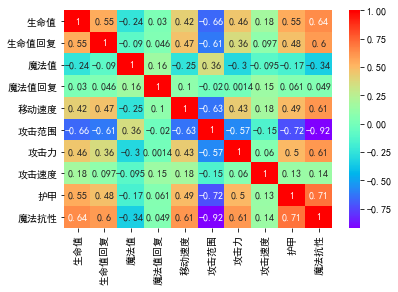

<Figure size 1008x1008 with 0 Axes>

In [22]:
sns.heatmap(corr,cmap = 'rainbow',annot = True)
plt.figure(figsize = (14,14))
plt.show()

<AxesSubplot:>

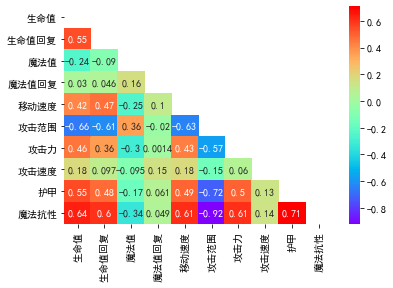

In [27]:
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr, cmap='rainbow',annot=True, mask=mask.T)
#改为对角矩阵形式的热力图